In [ ]:
# Sequential 

In [1]:
import tensorflow as tf

In [3]:
tf.__version__, tf.keras.__version__

('2.4.1', '2.4.0')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# load dataset
mnist = tf.keras.datasets.mnist

In [7]:
(train_x, train_y),(test_x, test_y) = mnist.load_data()

In [8]:
train_x.shape

(60000, 28, 28)

In [9]:
test_x.shape

(10000, 28, 28)

In [10]:
# data handling 

X_train, X_test = tf.cast(train_x/255.0, tf.float32), tf.cast(test_x/255.0, tf.float32)
y_train, y_test = tf.cast(train_y, tf.int16), tf.cast(test_y, tf.int16)

In [10]:
#X_test = test_x.reshape((10000, 28*28))

In [11]:
#step 1 build model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [12]:
#step 2, check summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
# step 3, set compile

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

In [14]:
# step 4 fit model

model.fit(X_train, y_train, batch_size=64,epochs=50, validation_split=0.2)


Epoch 1/50
750/750 [==============================] - 2s 2ms/step - loss: 0.5577 - sparse_categorical_accuracy: 0.8447 - val_loss: 0.1769 - val_sparse_categorical_accuracy: 0.9499
Epoch 2/50
750/750 [==============================] - 1s 1ms/step - loss: 0.1613 - sparse_categorical_accuracy: 0.9542 - val_loss: 0.1318 - val_sparse_categorical_accuracy: 0.9606
Epoch 3/50
750/750 [==============================] - 1s 1ms/step - loss: 0.1041 - sparse_categorical_accuracy: 0.9701 - val_loss: 0.1088 - val_sparse_categorical_accuracy: 0.9668
Epoch 4/50
750/750 [==============================] - 1s 2ms/step - loss: 0.0783 - sparse_categorical_accuracy: 0.9775 - val_loss: 0.1061 - val_sparse_categorical_accuracy: 0.9686
Epoch 5/50
750/750 [==============================] - 1s 1ms/step - loss: 0.0628 - sparse_categorical_accuracy: 0.9813 - val_loss: 0.0905 - val_sparse_categorical_accuracy: 0.9742
Epoch 6/50
750/750 [==============================] - 1s 2ms/step - loss: 0.0521 - sparse_categorica

In [15]:
model.evaluate(X_test, y_test, verbose = 2)

313/313 - 0s - loss: 0.1163 - sparse_categorical_accuracy: 0.9795


[0.11629582196474075, 0.9794999957084656]

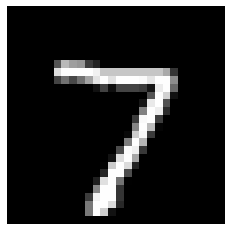

In [16]:
# step5 use the model

plt.axis('off')
plt.imshow(test_x[0], cmap='gray')
plt.show()

In [17]:
y_test[0]

<tf.Tensor: shape=(), dtype=int16, numpy=7>

In [18]:
X_train[0]

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 

In [19]:
X_test[0]

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 

In [20]:
model.predict(X_test[0:1])

array([[1.0479276e-14, 5.5571044e-21, 7.3214412e-10, 2.1520073e-08,
        7.5278223e-27, 1.0483343e-16, 6.9246521e-25, 1.0000000e+00,
        1.6858394e-13, 3.8604748e-11]], dtype=float32)

In [21]:
model.predict(X_test[2:3])

array([[2.4637575e-15, 1.0000000e+00, 2.3971800e-10, 7.3004401e-14,
        3.4677157e-11, 3.2687970e-14, 5.3220466e-11, 3.7753831e-09,
        2.5253602e-08, 1.8165828e-17]], dtype=float32)

In [22]:
np.argmax(model.predict(X_test[0:1]))

7

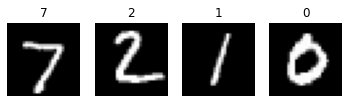

In [23]:
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.axis('off')
    plt.imshow(test_x[i], cmap='gray')
    plt.title(test_y[i])

In [24]:
model.predict(X_test[0:4])

array([[1.0479236e-14, 5.5571258e-21, 7.3214274e-10, 2.1520032e-08,
        7.5277938e-27, 1.0483343e-16, 6.9246260e-25, 1.0000000e+00,
        1.6858361e-13, 3.8604675e-11],
       [1.0332745e-17, 3.5188893e-13, 1.0000000e+00, 4.5098300e-16,
        2.0177477e-35, 3.1336292e-17, 2.1434378e-19, 8.8591705e-31,
        3.5207501e-16, 1.1801089e-24],
       [2.4637575e-15, 1.0000000e+00, 2.3971708e-10, 7.3004259e-14,
        3.4677091e-11, 3.2688031e-14, 5.3220466e-11, 3.7753831e-09,
        2.5253506e-08, 1.8165897e-17],
       [1.0000000e+00, 8.4813493e-25, 2.6224174e-14, 9.6191202e-21,
        4.1211262e-22, 2.0479683e-19, 5.2359641e-13, 2.6910401e-14,
        4.2923424e-23, 1.0472402e-14]], dtype=float32)

In [25]:
y_pred = np.argmax(model.predict(X_test[0:4]),axis = 1)

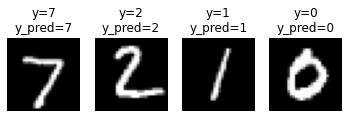

In [26]:
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.axis('off')
    plt.imshow(test_x[i], cmap='gray')
    plt.title('y='+ str(test_y[i])+'\ny_pred='+str(y_pred[i]))

In [27]:
X_test[2:3].shape

TensorShape([1, 28, 28])

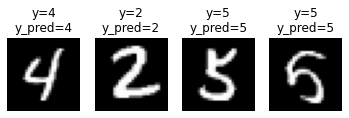

In [28]:
for i in range(4):
    
    # randomly choose some numbers
    num = np.random.randint(1,10000)
    
    plt.subplot(1,4,i+1)
    plt.axis('off')
    plt.imshow(test_x[num], cmap='gray')
    y_pred = np.argmax(model.predict(X_test[num:num+1]))
    plt.title('y='+ str(test_y[num])+'\ny_pred='+str(y_pred))

In [29]:
# saving model

In [30]:
model.save_weights('mnist_weights.h5') # only save the model, does not need to fit.

In [ ]:
model.load_weights('mnist_weights.h5') # reload model, but need to build a model(including the structures, activation function...) it needs to be the same as the model_weights

In [33]:
# to save whole model, including model structure,model parameters, setting infomation(optimizer, loss function, metrics), and the way to train it, iters, validition steps, sub_batch: 1, all, or part of it.. etc
model.save( 'mnist_model.h5',
#filepath, by default is current path
    overwrite=True, # if false, then not overwrite the former saved model
    include_optimizer = True # saving the current status of the optimizer. Because it takes long time to optimize w,b..
    #save_format = None
)

In [3]:
# restart kernel and load saved model. 

model_reload = tf.keras.models.load_model('mnist_model.h5')

In [4]:
model_reload.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


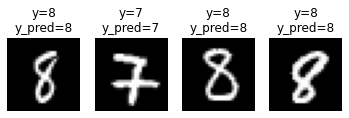

In [13]:
# test on the model
for i in range(4):
    
    # randomly choose some numbers
    num = np.random.randint(1,10000)
    
    plt.subplot(1,4,i+1)
    plt.axis('off')
    plt.imshow(test_x[num], cmap='gray')
    y_pred = np.argmax(model_reload.predict(X_test[num:num+1]))
    plt.title('y='+ str(test_y[num])+'\ny_pred='+str(y_pred))